# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [2]:
%pip install stopwords

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benog\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [134]:
# Add any additional import statements you need here
import string
import matplotlib.pyplot as plt


In [2]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/benog/OneDrive/Documents/Grad School/USD/ADS 509 Text Mining/Module 2/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [3]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    token_limit = 5
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens != 0 else 0.0
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        most_common_tokens = Counter(tokens).most_common(token_limit)
        print(f"\nThe {token_limit} most common tokens are:")
        for token, freq in most_common_tokens:
            print(f"'{token}' appears {freq} time(s)")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [4]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.

The 5 most common tokens are:
'text' appears 3 time(s)
'here' appears 2 time(s)
'example' appears 2 time(s)
'is' appears 1 time(s)
'some' appears 1 time(s)


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements help detect problems quickly and early on when programming. For example, some errors can fall several layers through the program before they are detected. Assertion statements catch these errors so that they do not slip into proceeding layers of code. Additionally, programmers understand that the assert condition holds true throughout the remaineder of code (as long as the assertion statement does not return errors, but errors will always be shown). 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [5]:
# Define paths for the lyrics and twitter folders
lyrics_path = os.path.join(data_location, lyrics_folder)
twitter_path = os.path.join(data_location, twitter_folder)

In [6]:
# Read in the lyrics data

# Function to load all lyric files for an artist
def load_lyrics(artist_folder):
    lyrics_data = []
    
    artist_path = os.path.join(lyrics_path, artist_folder)
    
    # Iterate through all the files in the artist's lyrics folder
    for filename in os.listdir(artist_path):
        if filename.endswith(".txt"):  # Assuming lyrics files are .txt
            with open(os.path.join(artist_path, filename), 'r', encoding='utf-8') as file:
                lyrics = file.read()
                # Assuming the song title is the filename (without extension)
                song = os.path.splitext(filename)[0]
                lyrics_data.append({"song": song, "lyrics": lyrics})
    
    # Convert to DataFrame
    return pd.DataFrame(lyrics_data)

In [7]:
# Function to convert all '_data.txt' files to .csv
def convert_txt_to_csv():
    files = os.listdir(twitter_path)
    
    # Iterate through all files and pick those ending with '_data.txt'
    for filename in files:
        if filename.endswith("_data.txt"):
            file_path = os.path.join(twitter_path, filename)
            
            try:
                # Read the txt file into a DataFrame (assuming tab-separated)
                df = pd.read_csv(file_path, delimiter="\t", on_bad_lines='skip')

                # Define the new CSV file path
                csv_filename = filename.replace("_data.txt", ".csv")
                csv_file_path = os.path.join(twitter_path, csv_filename)
                
                # Save the DataFrame as a CSV file
                df.to_csv(csv_file_path, index=False)
                print(f"Converted {filename} to {csv_filename}")

            except pd.errors.ParserError as e:
                print(f"Error parsing {filename}: {e}")

convert_txt_to_csv()

Converted cher_followers_data.txt to cher_followers.csv
Converted robynkonichiwa_followers_data.txt to robynkonichiwa_followers.csv


In [20]:
# Function to load Twitter data (only _data.txt files) for an artist
def load_twitter(artist_name):
    twitter_df = pd.DataFrame()
    
    # Iterate through all files in the twitter folder
    for filename in os.listdir(twitter_path):
        if filename.startswith(artist_name) and filename.endswith(".csv"):
            print(filename)
            file_path = os.path.join(twitter_path, filename)
            
            # Read the CSV file and select the 'description' column
            df = pd.read_csv(file_path)

            # Append the data to the artist's twitter DataFrame
            twitter_df = pd.concat([twitter_df, df], ignore_index=True)
    return twitter_df

load_twitter(twitter_folder)

""


In [57]:
# List of artist folders
artist_folders = ["cher", "robyn"]

# Dictionary to hold dataframes for each artist
artist_lyrics_dfs = {}
artist_twitter_dfs = {}

# Loop through each artist and store their lyrics in DataFrames
for artist in artist_folders:
    artist_lyrics_df = load_lyrics(artist)
    artist_lyrics_dfs[artist] = artist_lyrics_df

    # Load twitter data for the artist
    artist_twitter_df = load_twitter(artist)
    artist_twitter_dfs[artist] = artist_twitter_df
        

cher_followers.csv
robynkonichiwa_followers.csv


In [58]:
artist_lyrics_dfs["cher"].head()

,song,lyrics
0,cher_88degrees,"""88 Degrees""\n\n\n\nStuck in L.A., ain't got n..."
1,cher_adifferentkindoflovesong,"""A Different Kind Of Love Song""\n\n\n\nWhat if..."
2,cher_afterall,"""After All""\n\n\n\nWell, here we are again\nI ..."
3,cher_again,"""Again""\n\n\n\nAgain evening finds me at your ..."
4,cher_alfie,"""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs..."


In [23]:
artist_twitter_dfs["cher"].head()

,screen_name,name,id,location,followers_count,friends_count,description
0,hsmcnp,Country Girl,3.515221e+07,NaN,1302.0,1014.0,NaN
1,horrormomy,Jeny,7.421531e+17,Earth,81.0,514.0,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,anju79990584,anju,1.496463e+18,NaN,13.0,140.0,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,gallionjenna,J,3.366480e+09,NaN,752.0,556.0,csu
4,bcscomm,bcscomm,8.391504e+07,"Washington, DC",888.0,2891.0,Writer @Washinformer @SpelmanCollege alumna #D...


In [59]:
artist_lyrics_dfs["robyn"].head()

,song,lyrics
0,robyn_88days,"""88 Days""\n\n\n\nI light a candle in the morni..."
1,robyn_aintnothing,"""Ain't No Thing""\n\n\n\n[Verse 1:]\nBoy you go..."
2,robyn_anytimeyoulike,"""Anytime You Like""\n\n\n\nIt's like you're wai..."
3,robyn_babyforgiveme,"""Baby Forgive Me""\n\n\n\nHere come the night\n..."
4,robyn_beach2k20,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow..."


In [25]:
artist_twitter_dfs["robyn"].head()

,screen_name,name,id,location,followers_count,friends_count,description
0,AngelxoArts,Angelxo,1424055675030806529,"Zacatlan, Puebla, Mexico",29,535,I love chill •Facebook / Instagram / SoundClou...
1,songsfornikola,johnny,1502717352575651840,NaN,6,318,"books, movies, music, nature & TV shows. OG Sw..."
2,thibaud_lola,Thibaud Lola,1502407708246478852,NaN,3,69,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...
3,KyleSew2112,Kyle S 🌹🇬🇧🇺🇦,3423966821,South East London,1258,3444,This Twitter profile is full of sarcasm and ra...
4,MusiFlo,MusiFlo,3324069364,Canada,470,1706,Flora Youssef - Blogger & Founder Posting revi...


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [120]:
# Punctuation set excluding periods (.) to preserve abbreviations like L.A.
punctuation = set(string.punctuation) - {'.'}
extra_chars_to_remove = {'•'}

def clean_and_tokenize(text):
    # Remove HTTP and HTTPS links
    text = re.sub(r'http[s]?://\S+', '', text)
    
    # Remove .co domains
    text = re.sub(r'\b\w+\.co\b', '', text)
    
    # Replace escape characters like \n, \b, \r, etc. with space
    text = re.sub(r'[\n\r\t\b\f]', ' ', text)
    
    # Replace unwanted punctuation (except for hashtags) and the • character with space
    text = ''.join([char if char not in punctuation and char not in extra_chars_to_remove else ' ' for char in text])
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize by splitting on whitespace
    tokens = text.split()
    
    # Remove unwanted tokens such as 'null', 'nan'
    unwanted_tokens = {'null', 'nan'}
    tokens = [word for word in tokens if word not in sw and word not in unwanted_tokens]
    
    return tokens

In [121]:
# create your clean twitter data here
def process_twitter_data(df):
    # Create a new column 'cleaned_description' to store the cleaned tokens
    df['cleaned_description'] = df['description'].apply(lambda x: clean_and_tokenize(str(x)))
    return df

In [122]:
# create your clean lyrics data here
def process_lyrics_data(df):
    # Assuming the lyrics are in a column 'lyrics'
    df['cleaned_lyrics'] = df['lyrics'].apply(lambda x: clean_and_tokenize(str(x)))
    return df

In [123]:
# Process and clean the Twitter data for each artist
for artist in artist_folders:
    artist_twitter_dfs[artist] = process_twitter_data(artist_twitter_dfs[artist])
    artist_lyrics_dfs[artist] = process_lyrics_data(artist_lyrics_dfs[artist])

In [124]:
artist_lyrics_dfs['cher'][['lyrics', 'cleaned_lyrics']].head()

,lyrics,cleaned_lyrics
0,"""88 Degrees""\n\n\n\nStuck in L.A., ain't got n...","[88, degrees, stuck, l.a., got, friends, holly..."
1,"""A Different Kind Of Love Song""\n\n\n\nWhat if...","[different, kind, love, song, world, crazy, sa..."
2,"""After All""\n\n\n\nWell, here we are again\nI ...","[well, guess, must, fate, tried, deep, inside,..."
3,"""Again""\n\n\n\nAgain evening finds me at your ...","[evening, finds, door, ask, could, try, know, ..."
4,"""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs...","[alfie, alfie, moment, live, sort, alfie, mean..."


In [125]:
artist_lyrics_dfs['robyn'][['lyrics', 'cleaned_lyrics']].head()

,lyrics,cleaned_lyrics
0,"""88 Days""\n\n\n\nI light a candle in the morni...","[88, days, light, candle, morning, signify, st..."
1,"""Ain't No Thing""\n\n\n\n[Verse 1:]\nBoy you go...","[thing, verse, 1, boy, gotta, want, really, re..."
2,"""Anytime You Like""\n\n\n\nIt's like you're wai...","[anytime, like, like, waiting, start, right, m..."
3,"""Baby Forgive Me""\n\n\n\nHere come the night\n...","[baby, forgive, come, night, eyes, baby, brave..."
4,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow...","[beach, 2k20, wanna, go, gonna, get, ok, call,..."


In [126]:
artist_twitter_dfs['cher'][['description', 'cleaned_description']].head()

,description,cleaned_description
0,NaN,[]
1,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]"
2,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]"
3,csu,[csu]
4,Writer @Washinformer @SpelmanCollege alumna #D...,"[writer, washinformer, spelmancollege, alumna,..."


In [127]:
artist_twitter_dfs['robyn'][['description', 'cleaned_description']].head()

,description,cleaned_description
0,I love chill •Facebook / Instagram / SoundClou...,"[love, chill, facebook, instagram, soundcloud,..."
1,"books, movies, music, nature & TV shows. OG Sw...","[books, movies, music, nature, tv, shows., og,..."
2,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...,"[auteur, en, herbe, 🌱, juriste, en, paille, 🤡,..."
3,This Twitter profile is full of sarcasm and ra...,"[twitter, profile, full, sarcasm, rants, occas..."
4,Flora Youssef - Blogger & Founder Posting revi...,"[flora, youssef, blogger, founder, posting, re..."


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [113]:
from collections import Counter

def descriptive_stats(tokens, num_tokens=5, verbose=True):
    token_limit = num_tokens
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens != 0 else 0.0
    num_characters = sum(len(token) for token in tokens)
    
    # Calculate the five most common tokens
    most_common_tokens = Counter(tokens).most_common(token_limit)
    
    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        
        print(f"\n\nThe {token_limit} most common tokens are:")
        for token, freq in most_common_tokens:
            print(f"'{token}' appears {freq} time(s)")
    
    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters, most_common_tokens]


In [114]:
# calls to descriptive_stats here
for artist in artist_folders:
    # Get cleaned Twitter data tokens
    twitter_tokens = artist_twitter_dfs[artist]['cleaned_description'].tolist()
    twitter_tokens_flat = [token for sublist in twitter_tokens for token in sublist]
    
    # Get cleaned lyrics data tokens
    lyrics_tokens = artist_lyrics_dfs[artist]['cleaned_lyrics'].tolist()
    lyrics_tokens_flat = [token for sublist in lyrics_tokens for token in sublist]

    # Calculate and print descriptive statistics for Twitter data
    print(f"Descriptive stats for {artist}'s Twitter data:")
    twitter_stats = descriptive_stats(twitter_tokens_flat)
    print(twitter_stats[:4])  # Print only the first four elements of the stats
    print("\nMost common tokens in Twitter data:")
    for token, freq in twitter_stats[4]:
        print(f"'{token}' appears {freq} time(s)")
    
    # Calculate and print descriptive statistics for Lyrics data
    print(f"\nDescriptive stats for {artist}'s Lyrics data:")
    lyrics_stats = descriptive_stats(lyrics_tokens_flat)
    print(lyrics_stats[:4])  # Print only the first four elements of the stats
    print("\nMost common tokens in Lyrics data:")
    for token, freq in lyrics_stats[4]:
        print(f"'{token}' appears {freq} time(s)")
    
    print("\n" + "="*50 + "\n")

Descriptive stats for cher's Twitter data:
There are 16552974 tokens in the data.
There are 1534166 unique tokens in the data.
There are 95838517 characters in the data.
The lexical diversity is 0.093 in the data.


The 5 most common tokens are:
'love' appears 214182 time(s)
'life' appears 110680 time(s)
'music' appears 86716 time(s)
'de' appears 73647 time(s)
'follow' appears 62839 time(s)
[16552974, 1534166, 0.09268219716891961, 95838517]

Most common tokens in Twitter data:
'love' appears 214182 time(s)
'life' appears 110680 time(s)
'music' appears 86716 time(s)
'de' appears 73647 time(s)
'follow' appears 62839 time(s)

Descriptive stats for cher's Lyrics data:
There are 33082 tokens in the data.
There are 3685 unique tokens in the data.
There are 160562 characters in the data.
The lexical diversity is 0.111 in the data.


The 5 most common tokens are:
'love' appears 1021 time(s)
'know' appears 480 time(s)
'oh' appears 324 time(s)
'time' appears 321 time(s)
'baby' appears 318 time(s

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: There would be a lot of common words that don't hold much emphasis/weight. Everyone uses common words such as I, A, the, etc. These words do not make anyone stand out or hold any weight when comparing words with someone else.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I thought people would use certain words much more than others. However, it seems that people use the same words roughly as much as most people. I'm sure there are probably exceptions, but they are probably easily identified reading or listening to the words they chose. The English language also follows a specific structure that requires certain words to be utilized. This is a rule that every English speaker/writer must use.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [6]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [128]:
def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]

def get_most_common_emojis(descriptions, top_n=10):
    all_emojis = []
    for desc in descriptions:
        all_emojis.extend(extract_emojis(desc))
    emoji_counts = Counter(all_emojis)
    return emoji_counts.most_common(top_n)

for artist in artist_folders:
    twitter_descriptions = artist_twitter_dfs[artist]['cleaned_description'].tolist()

    # Flatten the list of lists into a single list of strings
    twitter_descriptions_flat = [desc for sublist in twitter_descriptions for desc in sublist]
    
    # Join all descriptions into a single text block for emoji extraction
    all_descriptions_text = ' '.join(twitter_descriptions_flat)
    
    # Get the most common emojis
    most_common_emojis = get_most_common_emojis([all_descriptions_text])
    
    # Print the ten most common emojis
    print(f"Ten most common emojis in {artist}'s Twitter descriptions:")
    for emoji_char, count in most_common_emojis:
        print(f"'{emoji_char}' appears {count} time(s)")
    
    print("\n" + "="*50 + "\n")

Ten most common emojis in cher's Twitter descriptions:
'❤' appears 79343 time(s)
'🌈' appears 47785 time(s)
'♥' appears 34231 time(s)
'🏳' appears 33583 time(s)
'✨' appears 29687 time(s)
'💙' appears 21495 time(s)
'🏻' appears 20963 time(s)
'🌊' appears 20315 time(s)
'✌' appears 16863 time(s)
'💜' appears 16602 time(s)


Ten most common emojis in robyn's Twitter descriptions:
'❤' appears 4805 time(s)
'🌈' appears 4701 time(s)
'🏳' appears 3538 time(s)
'♥' appears 3114 time(s)
'✨' appears 2235 time(s)
'🏻' appears 1497 time(s)
'✌' appears 1192 time(s)
'🏼' appears 1144 time(s)
'♀' appears 848 time(s)
'💙' appears 818 time(s)




### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [129]:
def extract_hashtags(text):
    """Extract hashtags from text."""
    return re.findall(r'#\w+', text)

def get_most_common_hashtags(descriptions, top_n=10):
    """Get the most common hashtags from a list of descriptions."""
    all_hashtags = []
    for desc in descriptions:
        all_hashtags.extend(extract_hashtags(desc))
    hashtag_counts = Counter(all_hashtags)
    return hashtag_counts.most_common(top_n)

# Loop through each artist to analyze their Twitter data
for artist in artist_folders:
    # Get cleaned Twitter data tokens
    twitter_descriptions = artist_twitter_dfs[artist]['cleaned_description'].tolist()
    
    # Flatten the list of lists into a single list of strings
    twitter_descriptions_flat = [desc for sublist in twitter_descriptions for desc in sublist]
    
    # Join all descriptions into a single text block for hashtag extraction
    all_descriptions_text = ' '.join(twitter_descriptions_flat)
    
    # Get the most common hashtags
    most_common_hashtags = get_most_common_hashtags([all_descriptions_text])
    
    # Print the ten most common hashtags
    print(f"The ten most common hashtags in {artist}'s Twitter descriptions:")
    for hashtag, count in most_common_hashtags:
        print(f"{hashtag} appears {count} time(s)")
    
    print("\n" + "="*50 + "\n")

The ten most common hashtags in cher's Twitter descriptions:


The ten most common hashtags in robyn's Twitter descriptions:




### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [132]:
def clean_and_tokenize_titles(text):
    """Clean and tokenize song titles."""
    # Remove unwanted punctuation (except periods) and the • character with space
    text = ''.join([char if char not in punctuation and char not in extra_chars_to_remove else ' ' for char in text])
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize by splitting on whitespace
    tokens = text.split()
    
    # Remove unwanted tokens such as 'null', 'nan'
    unwanted_tokens = {'null', 'nan'}
    tokens = [word for word in tokens if word not in sw and word not in unwanted_tokens]
    
    return tokens

def get_most_common_words(titles, top_n=5):
    """Get the most common words from a list of titles."""
    all_words = []
    for title in titles:
        all_words.extend(clean_and_tokenize_titles(title))
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# List of artist folders
artist_folders = ["cher", "robyn"]

# Dictionary to hold song titles for each artist
artist_song_titles = {}

# Loop through each artist to extract song titles
for artist in artist_folders:
    lyrics_folder_path = os.path.join(data_location, lyrics_folder, artist)
    
    song_titles = []
    
    for filename in os.listdir(lyrics_folder_path):
        if filename.endswith(".txt"):  # Assuming the lyrics files are .txt
            file_path = os.path.join(lyrics_folder_path, filename)
            
            with open(file_path, 'r', encoding='utf-8') as file:
                # Read the first line as the song title
                first_line = file.readline().strip()
                song_titles.append(first_line)
    
    artist_song_titles[artist] = song_titles
    
    # Get the most common words in song titles
    most_common_words = get_most_common_words(song_titles)
    
    # Print the five most common words in song titles
    print(f"The five most common words in song titles for {artist}:")
    for word, count in most_common_words:
        print(f"'{word}' appears {count} time(s)")
    
    print("\n" + "="*50 + "\n")

The five most common words in song titles for cher:
'love' appears 38 time(s)
'man' appears 15 time(s)
'song' appears 11 time(s)
'come' appears 7 time(s)
'one' appears 7 time(s)


The five most common words in song titles for robyn:
'love' appears 6 time(s)
'u' appears 4 time(s)
'thing' appears 3 time(s)
'girl' appears 3 time(s)
'tell' appears 3 time(s)




### Song Lengths

For each artist, create a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


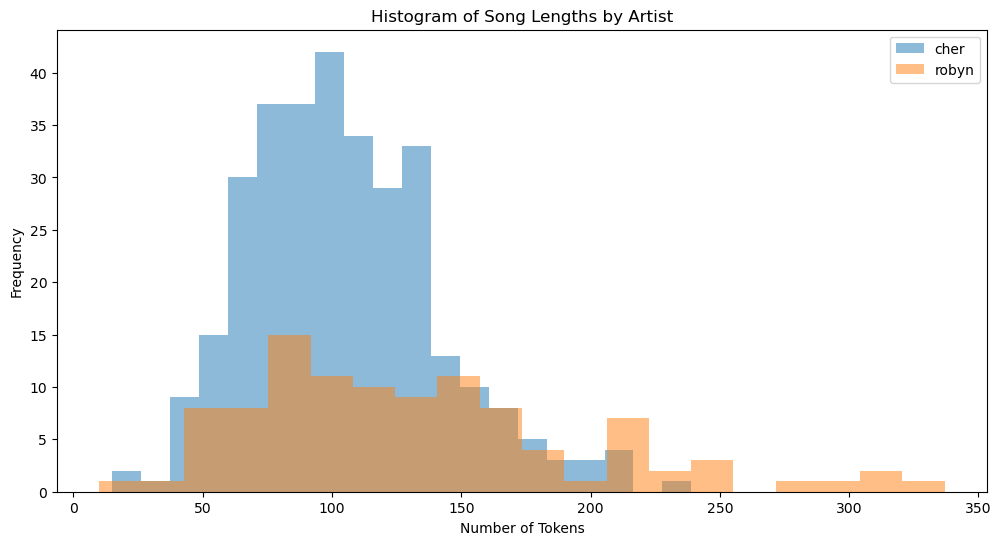

In [135]:
# Define a function to calculate song length in tokens
def get_song_lengths(lyrics_folder_path):
    """Calculate the length of each song in terms of number of tokens."""
    song_lengths = []
    
    for filename in os.listdir(lyrics_folder_path):
        if filename.endswith(".txt"):  # Assuming the lyrics files are .txt
            file_path = os.path.join(lyrics_folder_path, filename)
            
            with open(file_path, 'r', encoding='utf-8') as file:
                # Read the entire file content (excluding the first line)
                lyrics = file.read().strip()
                
                # Tokenize the lyrics
                tokens = clean_and_tokenize(lyrics)
                
                # Append the number of tokens (length of the song)
                song_lengths.append(len(tokens))
    
    return song_lengths

# List of artist folders
artist_folders = ["cher", "robyn"]

# Create a list to hold data for the DataFrame
data = []

# Loop through each artist to calculate song lengths
for artist in artist_folders:
    lyrics_folder_path = os.path.join(data_location, lyrics_folder, artist)
    
    song_lengths = get_song_lengths(lyrics_folder_path)
    
    # Append data for each artist
    for length in song_lengths:
        data.append({'artist': artist, 'song_length': length})

# Create a DataFrame
df_song_lengths = pd.DataFrame(data)

# Plot histograms
plt.figure(figsize=(12, 6))

for artist in artist_folders:
    artist_data = df_song_lengths[df_song_lengths['artist'] == artist]
    plt.hist(artist_data['song_length'], bins=20, alpha=0.5, label=artist)

plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Song Lengths by Artist')
plt.legend()
plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: `'\s+'` matches on whitespace characters. This is very handy when we need to identify multiple whitespace charaters in a row (e.g. \n\n\n). The whitespace charaters \s+ can match on includes spaces, tabs, \n (newline), \r (carriage return), \f (form feed), and \v (vertical tab).


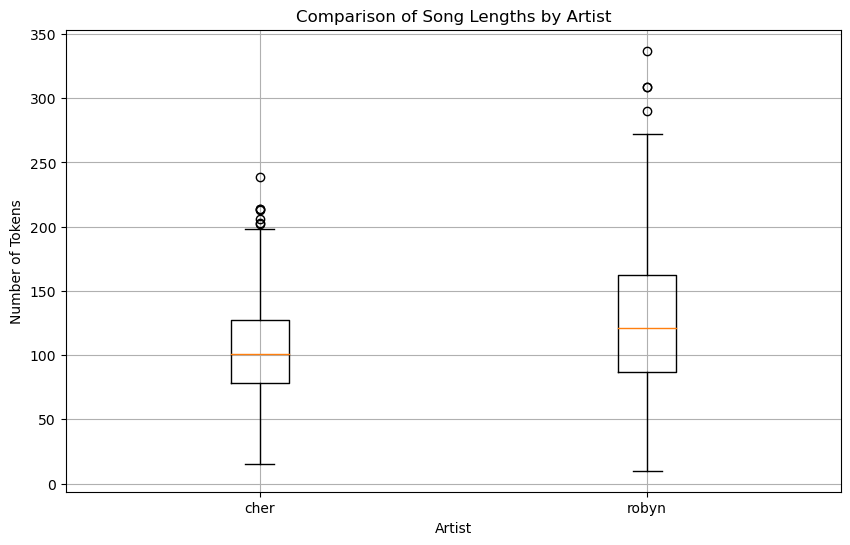

In [136]:
# List of artist folders
artist_folders = ["cher", "robyn"]

# Create a list to hold data for the DataFrame
data = []

# Loop through each artist to calculate song lengths
for artist in artist_folders:
    lyrics_folder_path = os.path.join(data_location, lyrics_folder, artist)
    
    song_lengths = get_song_lengths(lyrics_folder_path)
    
    # Append data for each artist
    for length in song_lengths:
        data.append({'artist': artist, 'song_length': length})

# Create a DataFrame
df_song_lengths = pd.DataFrame(data)

# Plot boxplot for lyric lengths
plt.figure(figsize=(10, 6))

# Create a boxplot
plt.boxplot([df_song_lengths[df_song_lengths['artist'] == artist]['song_length'] for artist in artist_folders],
            labels=artist_folders)

plt.xlabel('Artist')
plt.ylabel('Number of Tokens')
plt.title('Comparison of Song Lengths by Artist')
plt.grid(True)

# Show plot
plt.show()